In [1]:

import pickle
import time
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
from tqdm import tqdm
from sklearn.decomposition import PCA
import plotly.express as px
import umap.umap_ as umap
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
# Loading feature matrix
with open("feature_embedding.pkl", 'rb') as f:
    feature_matrix = pickle.load(f)
print("Shape of the feature embedding:", feature_matrix.shape)    

Shape of the feature embedding: (29879, 122)


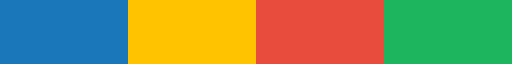

In [3]:
dataset = pd.read_csv("main_data_wo_outliers.csv")
y = dataset["disease"]
y_unique = np.unique(y)
diseases = len(set(y))

#source: https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps
cmaps = {}
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(category, cmap_list):
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(8.4, 6))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    for ax in axs:
        ax.set_axis_off()

    cmaps[category] = cmap_list

flatui = ["#1a77ba", "#ffc300", "#e74c3c", "#1db55d"]
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())
current_palette = my_cmap
colors = current_palette
colors


## PCA Dimensionality Reduction and Explained Variance Ratio

---PCA: 0.4988534450531006 seconds ---


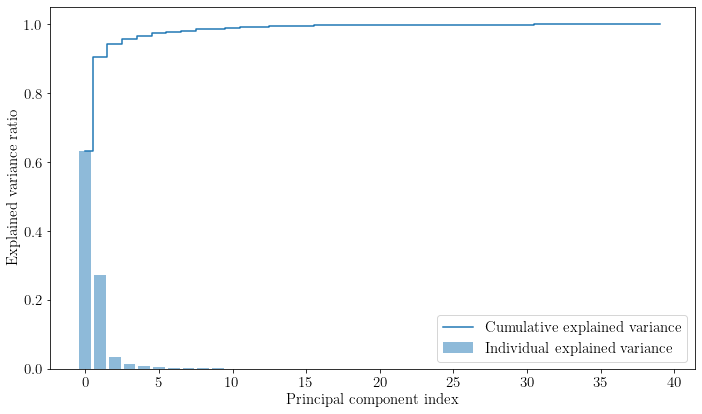

In [4]:
start_time = time.time()
pca = PCA(n_components = 40)
X_pca = pca.fit_transform(feature_matrix)

print("---PCA: %s seconds ---" % (time.time() - start_time))

#Source: Internet
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.figure(figsize=(10, 6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [5]:
X_pca.shape

(29879, 40)

## UMAP Dimensionality Reduction and 3D Visualization

In [6]:
start_time = time.time()
umap_embedding = umap.UMAP(min_dist=0.4, random_state=42, n_neighbors=100, n_components=3).fit_transform(X_pca)
print((time.time() - start_time))


111.36898827552795


In [7]:
# 3D Representation of the feature embedding
fig_3d = px.scatter_3d(
    umap_embedding, x=0, y=1, z=2,
    color=dataset["disease"], opacity=0.9)

fig_3d.show()

## UMAP Dimensionality Reduction and 2D Visualization

In [8]:
start_time = time.time()
umap_embedding = umap.UMAP(min_dist=0.4, random_state=42, n_neighbors=100, n_components=2).fit_transform(X_pca)
print((time.time() - start_time))


120.4022274017334


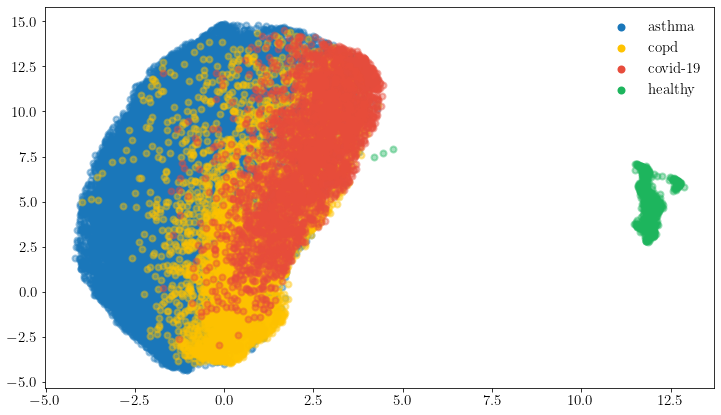

In [9]:
## UMAP Dimensionality Reduction and 2D Visualization

title=None
plt.figure(figsize=(12, 7))
for color, i, target_name in zip(colors.colors, range(diseases), y_unique):
    plt.scatter(umap_embedding[y == target_name, 0], umap_embedding[y == target_name, 1],
                    color=color, lw=2, label=target_name, alpha=0.4)
plt.title(title, fontsize = 20)
legend = plt.legend(loc="best", shadow=False, frameon=False, scatterpoints=1, fontsize = 15)
for lh in legend.legendHandles: 
    lh.set_alpha(1)


plt.show()

# plt.savefig("..\\Plots\\feature_embedding.pdf", dpi=100)
# plt.savefig("..\\Plots\\feature_embedding.png", dpi=100)

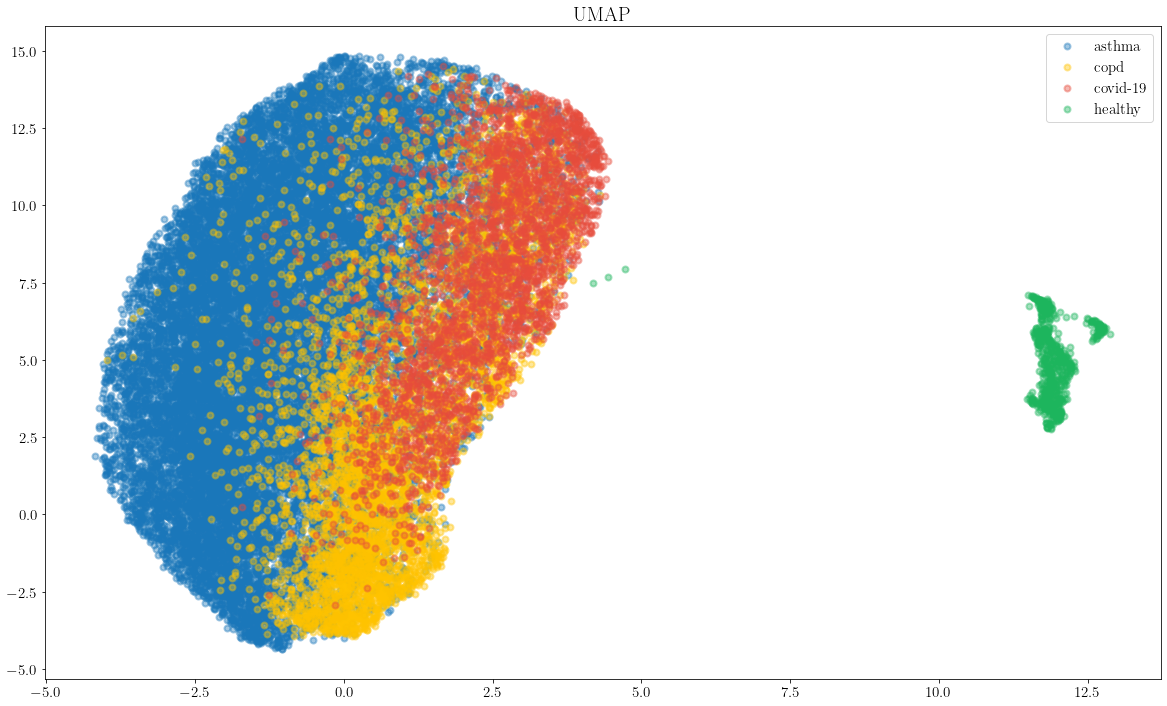

In [10]:

title="UMAP"
plt.figure(figsize=(20, 12))
for color, i, target_name in zip(colors.colors, range(diseases), y_unique):
    plt.scatter(umap_embedding[y == target_name, 0], umap_embedding[y == target_name, 1],
                    color=color, lw=2, label=target_name, alpha=0.4)
plt.title(title, fontsize = 20)
plt.legend(loc="best", shadow=False, scatterpoints=1, fontsize = 15)
plt.show()